What do we mean by random? <a name="generate"></a>
<div class="alert alert-block alert-success">
It roughly means unpredictable, where only probabilities can be calculated. For example, let's consider a spinning coin. While it’s spinning, it is in the state of both head and tails i.e. it is in superposition of head and tail.We will not be able to predict the results until the coin is collapsed. If we denote head as 0 and tail as 1 and we perform this experiment n times, we will get a bit string s ε {0,1}ⁿ. 

Random numbers are essential in cryptography, Monte Carlo numerical simulations, lottery, gambling, statistical research, randomized algorithms etc. But there is a catch. The spinning coin and its results are not random as we think because we don’t have all the necessary information such as the weight of the coin, it’s shape, the amount of force required to spin the coin, air resistance is not known to us in order for us to determine what outcome would be after spinning the coin. If we had some function that could calculate all this information, then we would be able to determine the resultant bit string successfully. 

Same is true about the random number generating algorithms we use nowadays. When we trigger a computer to generate a random number, the computer uses a variety of information to calculate and generate a random bit string. These parameters can include parameters such as current daytime, value of pi, information about the user and so on. These types of random number generators are called pseudorandom number generator or PSRN or Deterministic Random Bit Generator (DRBG). If we know the parameters used and how they are used to generate the
random bit sequence, we will be able to determine the numbers easily. This is a weak point for current random number generating system which can be used by hackers to break encryptions. 

To counteract this, we have a principle of quantum mechanics called superposition where a particle can be in it’s every possible state simultaneously but collapsed to a single state when observed/measured. Now, unlike spinning coins, it is totally unpredictable. There is no hidden variable by which we can predict the outcome of measurement. So, we can take this advantage of the quantum world to build a true random bit sequence generator. 

Quantum Random Number Generator can be created in more than one ways. Besides using only Hadamard, we can also use bell states and quantum walk to create QRNG. But here we are demonstrating the simplest one, using hadamard gates only

In [1]:
#importing necessary libraries
from qiskit import *
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_aer import QasmSimulator

Enter the length of bitstring:  5


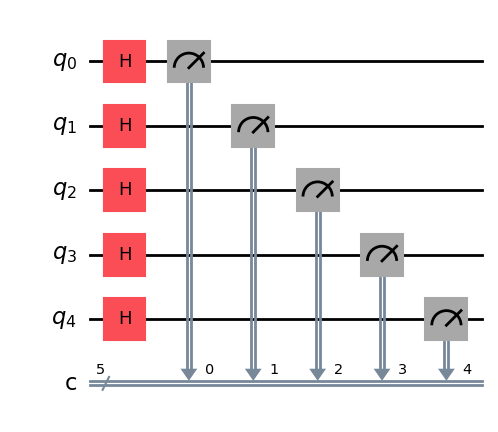

In [3]:
#Constructing the circuit
n = int(input("Enter the length of bitstring: "))
n_q = n
n_c = n
qc = QuantumCircuit(n_q, n_c)
for i in range(n):
    qc.h(i)
    qc.measure(i, i)
qc.draw('mpl')


In [5]:
#Execution of the Circuit(just for single shot to get random number)
#
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1)
result = job.result().get_counts()
keys = result.keys()
for key in keys:
    print("The random number is: ", int(key,2))

The random number is:  9


In [7]:
#Execution of Circuit(for multiple shots to understand superposition)
shot = int(input("Enter the number of shots you want(shots>1): "))
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=shot)
result_superposition = job.result().get_counts()
result_superposition


Enter the number of shots you want(shots>1):  1024


{'11011': 27,
 '11000': 39,
 '01001': 27,
 '01111': 32,
 '00010': 38,
 '10010': 28,
 '10110': 25,
 '10011': 29,
 '01110': 44,
 '11110': 30,
 '10100': 26,
 '00111': 40,
 '10001': 26,
 '01000': 39,
 '10111': 27,
 '01101': 32,
 '01011': 31,
 '00001': 26,
 '11010': 34,
 '00011': 29,
 '10101': 30,
 '00101': 40,
 '00000': 29,
 '10000': 32,
 '11001': 35,
 '00110': 35,
 '11101': 36,
 '11100': 32,
 '01010': 39,
 '00100': 26,
 '01100': 30,
 '11111': 31}

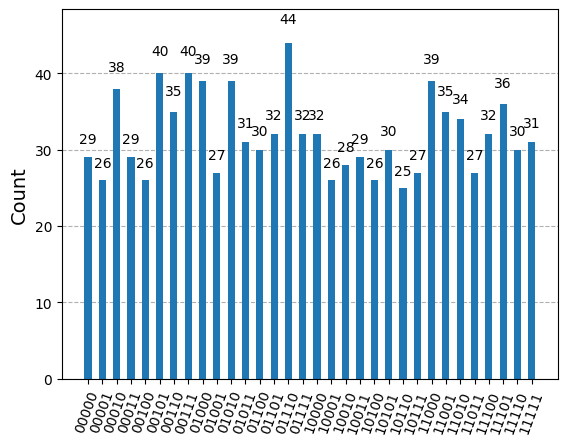

In [9]:
#Visualizing the statistics of outcomes
plot_histogram(result_superposition)

Here we can see that some numbers are returned more often than others. This is due to intrinsic noise in the quantum system(here in Qasm simulator).
The phenomenon where certain values are returned more frequently than others during quantum measurements can primarily be attributed to intrinsic noise in quantum systems, which arises from several factors:

	•	Imperfect Gates: Quantum gates do not always perform perfectly, and any errors introduced during gate operations can affect the outcome probabilities. For instance, if a Hadamard gate is applied with some fidelity less than 1, it might not transform states as intended, skewing the results.
	•	Measurement Errors: The process of measuring qubits can introduce additional errors, where the expected outcomes do not match the actual measurements due to readout noise. This can lead to bias in the results, favoring certain outcomes over others.
	•	State Preparation Errors: If the initial state of the qubits is not prepared accurately, it may not be in a proper superposition. This could cause certain measurement outcomes to appear more frequently.
	•	Coherence Time: Qubits have a limited time to maintain their quantum state before decoherence occurs. If operations are performed too slowly, the state may collapse before the measurement, leading to biased results.



Part 2: Error Mitigation:
1. Readout Error Mitigation

	•	Description: This technique addresses the errors that occur during the measurement of qubits. Qubits might flip from one state to another during readout, introducing noise in the final measurement.
	•	Method: To mitigate this, one can use calibration matrices built by measuring known states and comparing them to actual measured states. These matrices are then used to correct subsequent measurements.
	•	Example: IBM’s Qiskit offers a built-in readout error mitigation framework called TREX.

2. Zero-Noise Extrapolation (ZNE)

	•	Description: ZNE mitigates errors by artificially increasing the noise in a quantum circuit and then extrapolating the results back to the zero-noise limit.
	•	Method: The process involves running the same circuit with different levels of noise (by applying multiple identical gates to amplify the noise) and using extrapolation techniques, like linear or exponential fits, to estimate what the result would have been with no noise.
	•	Example: This method is especially useful in mitigating gate errors.

3. Gate Error Mitigation (Gate Twirling)

	•	Description: This approach focuses on reducing errors introduced by gate operations (e.g., errors in applying single or multi-qubit gates).
	•	Method: Gate twirling randomizes coherent errors, which turn them into stochastic (incoherent) errors. This is easier to mitigate because random errors average out over multiple runs.
	•	Example: Twirling can be applied by adding certain gate operations randomly and then analyzing their averaged results.

4. Probabilistic Error Cancellation (PEC)

	•	Description: This technique involves using a model of the noise present in the system to probabilistically reverse or cancel out the errors that occur during gate operations.
	•	Method: Error channels (i.e., noise models) are measured and inverted, allowing errors to be reversed probabilistically. This technique can be highly effective but is computationally expensive.
	•	Example: Inversion of the noise map from noisy quantum channels helps approximate the noiseless result.

Additional Techniques:

	1.	Dynamical Decoupling:
	•	This involves inserting sequences of gates between operations to counteract noise, particularly noise from environmental decoherence. It works by periodically flipping qubit states to refocus errors.
	2.	Error-Aware Compilation:
	•	This method involves optimizing the compilation of circuits in such a way that gates are mapped to physical qubits that experience less noise or are less prone to errors.

In short, the four techniques you refer to (readout error mitigation, ZNE, gate twirling, and PEC) cover some of the most significant error mitigation methods, but there are additional specialized techniques depending on the specific sources of error in quantum systems. 

In [ ]:
%set_env QXToken=1cec2291cf5af5ab17f315eb0981c6eba52d9c117f68e17177ac022ed67a7aa27404e4d63a05784e812ba1a90d1834a38f0ffe2a2a8cb0ac001105acc23aad95


Optimize circuits for quantum hardware execution


The following cell imports the Estimator primitive and creates a backend that will be used for initializing the Estimator

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
QiskitRuntimeService.save_account(channel="ibm_quantum", token="1cec2291cf5af5ab17f315eb0981c6eba52d9c117f68e17177ac022ed67a7aa27404e4d63a05784e812ba1a90d1834a38f0ffe2a2a8cb0ac001105acc23aad95")



In [17]:
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
 
# Setting options during primitive initialization
estimator = Estimator(backend, options={"resilience_level": 2})

In [13]:
from qiskit.quantum_info import SparsePauliOp

# Define a valid observable using Pauli X operators on each qubit
observable = SparsePauliOp.from_list([("X" * n, 1.0)])  # n Pauli X's acting on each qubit
print(observable)

SparsePauliOp(['XXXXX'],
              coeffs=[1.+0.j])


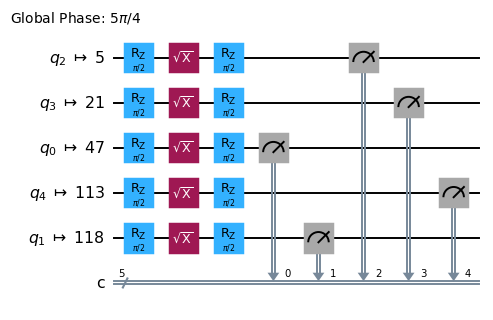

In [18]:
#transpiled_qc = transpile(qc, backend=backend)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pass_manager = generate_preset_pass_manager(
    optimization_level=3, backend=backend, seed_transpiler=1234
)
isa_circuit = pass_manager.run(qc)

isa_circuit.draw("mpl", idle_wires=False, scale=0.7, fold=-1)

In [21]:
isa_observable = observable.apply_layout(isa_circuit.layout)

print("Original observable:")
print(observable)
print()
print("Observable with layout applied:")
print(isa_observable)

Original observable:
SparsePauliOp(['XXXXX'],
              coeffs=[1.+0.j])

Observable with layout applied:
SparsePauliOp(['IIIIIIIIXIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIXIIIII'],
              coeffs=[1.+0.j])


Execute circuits using the Estimator primitive

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator, Batch
# To store job results
jobs = []

# Create a batch execution to test different configurations
with Batch(backend=backend) as batch:
    estimator = Estimator(mode=batch)
    
    # Set default number of shots to 100,000 for each job
    estimator.options.default_shots = 100000
    
    # Define the observable and circuit pair for the Estimator
    pub = (isa_circuit, isa_observable)

    # Job 1: No error mitigation
    estimator.options.optimization_level = 0  # Disable runtime compilation
    estimator.options.resilience_level = 0    # Disable error mitigation
    job1 = estimator.run([pub])               # Submit job
    jobs.append(job1)

   # Job 2:Gate Twirling
    estimator.options.twirling.enable_gates = True          # Enable gate twirling
    estimator.options.twirling.num_randomizations = "auto"  # Automatic randomization count
    job2 = estimator.run([pub])                             # Submit job with DD + TREX + Twirling
    jobs.append(job2)

    # Job 3:Twirling + Zero-Noise Extrapolation (ZNE)
    estimator.options.resilience.zne_mitigation = True      # Enable ZNE mitigation
    estimator.options.resilience.zne.noise_factors = (1, 3, 5)  # Noise scaling factors
    estimator.options.resilience.zne.extrapolator = ("exponential", "linear")  # Extrapolation methods
    job3 = estimator.run([pub])                             # Submit job with full error mitigation
    jobs.append(job3)

In [27]:
for job in jobs:
    print(job.status())
    print(job.result())

DONE
PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(), dtype=float64>)), metadata={'shots': 100000, 'target_precision': 0.003162277660168379, 'circuit_metadata': {}, 'num_randomizations': 1})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': False, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': False, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2})
DONE
PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.ndarray(<shape=(), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(), dtype=float64>)), metadata={'shots': 100000, 'target_precision

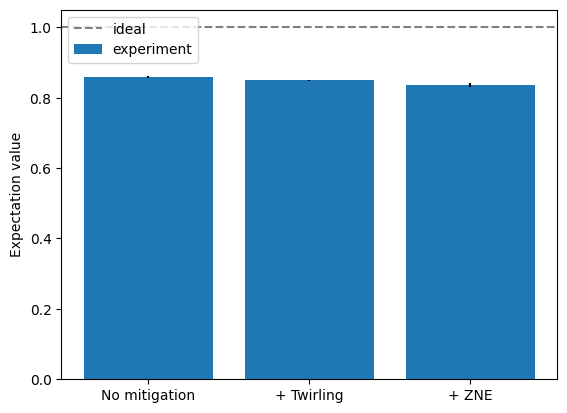

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# Retrieve the job results
results = [job.result() for job in jobs]

# Unpack the PUB results (there's only one PUB result in each job result)
pub_results = [result[0] for result in results]

# Unpack the expectation values and standard errors
expectation_vals = np.array([float(pub_result.data.evs) for pub_result in pub_results])
standard_errors = np.array([float(pub_result.data.stds) for pub_result in pub_results])

# Plot the expectation values
fig, ax = plt.subplots()
labels = ["No mitigation", "+ Twirling", "+ ZNE"]
ax.bar(range(len(labels)), expectation_vals, yerr=standard_errors, label="experiment")
ax.axhline(y=1.0, color="gray", linestyle="--", label="ideal")
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel("Expectation value")
ax.legend(loc="upper left")

plt.show()

We can see there is no significant improvement and Zero Noise Extrapolation has lower performance than no mitigation, so now we execute readout error mitigation technique and compare it with no error and Twirling and see the result

In [38]:
jobs_new1 = []

# Create a batch execution to test different configurations
with Batch(backend=backend) as batch:
    estimator = Estimator(mode=batch)
    
    # Set default number of shots to 100,000 for each job
    estimator.options.default_shots = 100000
    
    # Define the observable and circuit pair for the Estimator
    pub = (isa_circuit, isa_observable)

    # Job 1: No error mitigation
    estimator.options.optimization_level = 0  # Disable runtime compilation
    estimator.options.resilience_level = 0    # Disable error mitigation
    job1 = estimator.run([pub])               # Submit job
    jobs_new1.append(job1)

    #Job 2: Readout Error Mitigation (TREX)
    estimator.options.resilience.measure_mitigation = True  # Enable readout error mitigation
    job2 = estimator.run([pub])                             # Submit job with  TREX
    jobs_new1.append(job2)
# Job 3:Gate Twirling
    estimator.options.twirling.enable_gates = True          # Enable gate twirling
    estimator.options.twirling.num_randomizations = "auto"  # Automatic randomization count
    job3 = estimator.run([pub])                             # Submit job with TREX + Twirling
    jobs_new1.append(job3)
    

Post-process and return results in classical format

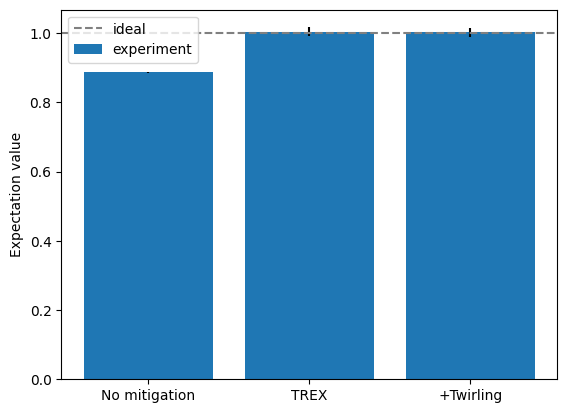

In [42]:
import matplotlib.pyplot as plt

# Retrieve the job results
results = [job.result() for job in jobs_new1]

# Unpack the PUB results (there's only one PUB result in each job result)
pub_results = [result[0] for result in results]

# Unpack the expectation values and standard errors
expectation_vals = np.array([float(pub_result.data.evs) for pub_result in pub_results])
standard_errors = np.array([float(pub_result.data.stds) for pub_result in pub_results])

# Plot the expectation values
fig, ax = plt.subplots()
labels = ["No mitigation","TREX","+Twirling"]
ax.bar(range(len(labels)), expectation_vals, yerr=standard_errors, label="experiment")
ax.axhline(y=1.0, color="gray", linestyle="--", label="ideal")
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel("Expectation value")
ax.legend(loc="upper left")

plt.show()

In this experiment, both readout error mitigation and gate twirling have provided significant improvements compared to running the circuit without mitigation. This result highlights the importance of error mitigation techniques in quantum computations, especially in noisy intermediate-scale quantum (NISQ) devices, where noise plays a critical role in degrading the quality of results.
